In [1]:
PATH = 'Dataset'

In [28]:
import os, numpy as np, random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
class_names = []

for i in os.listdir(PATH):
    class_names.append(i)
class_num = len(class_names)
class_names


['ace-of-diamonds', 'five-of-spades', 'jack-of-hearts', 'six-of-diamonds']

In [7]:
dataset = []

for class_name in os.listdir(PATH):
    for img_name in os.listdir(PATH + '/' + class_name):
        img_path = PATH + '/' + class_name + '/' + img_name

        img = tf.keras.utils.load_img(img_path, color_mode='grayscale')
        img = np.array(img)

        dataset.append((img, class_names.index(class_name)))
random.shuffle(dataset)
dataset[0]

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 254, 254],
        [255, 255, 255, ..., 255, 255, 254],
        [255, 255, 255, ..., 255, 254, 254]], dtype=uint8),
 0)

In [8]:
X = []
y = []
for img, category in dataset:
    X.append(img)
    y.append(category)
X

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 254, 254],
        [255, 255, 255, ..., 255, 255, 254],
        [255, 255, 255, ..., 255, 254, 254]], dtype=uint8),
 array([[242, 243, 243, ..., 243, 243, 243],
        [242, 243, 243, ..., 243, 243, 243],
        [243, 242, 242, ..., 244, 243, 243],
        ...,
        [241, 242, 243, ..., 247, 251, 248],
        [242, 242, 243, ..., 245, 243, 241],
        [242, 242, 242, ..., 244, 241, 243]], dtype=uint8),
 array([[242, 243, 246, ..., 254, 251, 248],
        [249, 247, 247, ..., 254, 252, 250],
        [254, 251, 249, ..., 254, 253, 252],
        ...,
        [254, 254, 254, ..., 249, 250, 251],
        [254, 254, 254, ..., 245, 249, 250],
        [254, 254, 254, ..., 247, 249, 248]], dtype=uint8),
 array([[232, 232, 225, ..., 240, 238, 238],
        [228, 230, 229, ..., 233, 232, 233],
        [230, 23

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32') / 255
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32') / 255

In [18]:
X_train.shape

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPo....blatt
from tensor

(472, 224, 224, 1)

In [21]:
model = Sequential([
    Conv2D(16, activation='relu', kernel_size=(3,3), input_shape=(224,224,1)),
    MaxPooling2D(2, 2),
    Conv2D(32, activation='relu', kernel_size=(3,3)),
    MaxPooling2D(2,2),
    Conv2D(32, activation='relu', kernel_size=(3,3)),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(32, activation='relu'),
    Dropout(rate=0.1),
    Dense(16, activation='relu'),
    Dropout(rate=0.1),
    Dense(class_num, activation='softmax'),
])

In [22]:
model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=('accuracy'))

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

Epoch 1/10
30/30 [==============================] - 10s 293ms/step - loss: 1.3861 - accuracy: 0.2818 - val_loss: 1.4011 - val_accuracy: 0.1864
Epoch 2/10
30/30 [==============================] - 9s 289ms/step - loss: 1.3836 - accuracy: 0.3030 - val_loss: 1.4888 - val_accuracy: 0.1864
Epoch 3/10
30/30 [==============================] - 9s 294ms/step - loss: 1.3799 - accuracy: 0.2945 - val_loss: 1.5776 - val_accuracy: 0.1864
Epoch 4/10
30/30 [==============================] - 9s 284ms/step - loss: 1.3782 - accuracy: 0.2924 - val_loss: 1.4881 - val_accuracy: 0.1864
Epoch 5/10
30/30 [==============================] - 9s 290ms/step - loss: 1.3814 - accuracy: 0.2839 - val_loss: 1.4389 - val_accuracy: 0.1864
Epoch 6/10
30/30 [==============================] - 8s 283ms/step - loss: 1.3759 - accuracy: 0.2881 - val_loss: 1.4545 - val_accuracy: 0.1864
Epoch 7/10
30/30 [==============================] - 7s 241ms/step - loss: 1.3747 - accuracy: 0.3030 - val_loss: 1.4324 - val_accuracy: 0.1864
Epoch

In [ ]:
pred = model.predict(X_test)
pred_res = np.argmax(pred, axis=1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {test_acc}')

2/2 [==============================] - 0s 125ms/step - loss: 1.3717 - accuracy: 0.2500
1.3716697692871094 0.25


Text(0, 0.5, 'Epochs')

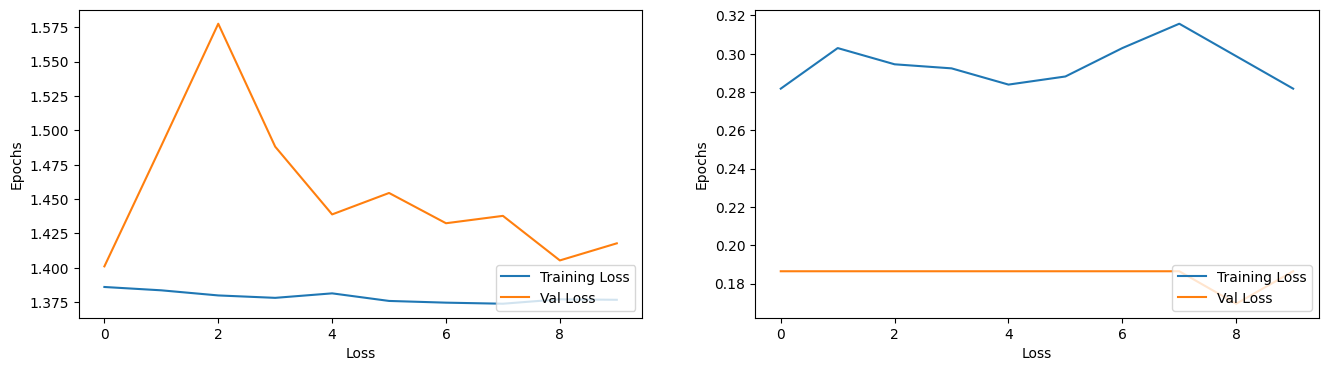

In [33]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(loc='lower right')
plt.xlabel('Loss')
plt.ylabel('Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Val Loss')
plt.legend(loc='upper right')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')